In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [41]:
iris = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [42]:
X = iris.iloc[:, 2:-1].values #independent variable only use petal_length and petal_width
y = iris.iloc[:, -1].values #label

In [43]:
le = LabelEncoder()
y = le.fit_transform(y)  

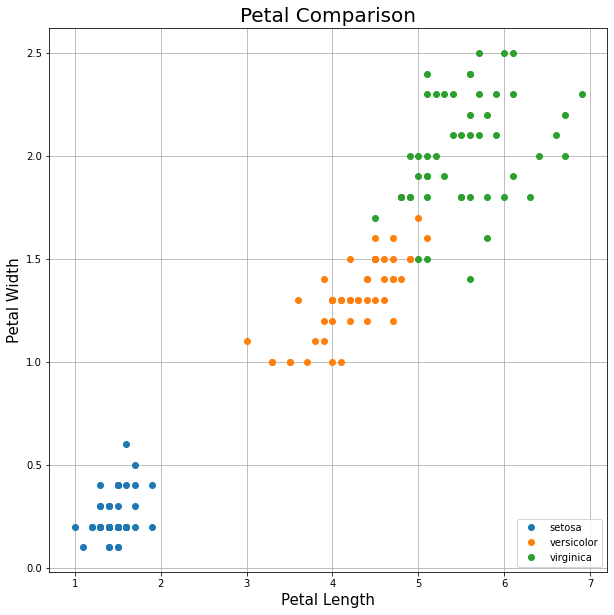

In [44]:
groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["petal_length"], group["petal_width"], marker="o", linestyle="", label=name)
plt.legend(loc = "lower right")
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Petal Comparison", fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)

plt.show()

In [45]:
w0 = [] 
for i in range (1,151): 
  w0.append(np.array([1]))  
X = np.append(X, w0,  axis = 1) 

In [46]:
first_y = np.where(y == 0 , 0 , 1) 
print(len(first_y))
print(first_y)

150
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [47]:
new_X = X
new_y = np.reshape (first_y,(-1,1))
new_X = np.append(new_X, new_y, axis = 1) 
np.random.shuffle(new_X) 
first_y = new_X[:,-1] 
first_x = new_X[:,:-1]

In [16]:
y = np.reshape(y, (-1,1)) #the process is the same like before but needs to re labeling
new_dataset= np.append(X, y , axis = 1)
new_dataset = new_dataset[50:,:] #but in this process exclude class 0 which the decision boundary is already created
new_dataset[:,-1] = np.where(new_dataset[:,-1]== 1, 0, 1)
np.random.shuffle(new_dataset)
second_X = new_dataset[:,:-1]
second_y = new_dataset[:,-1]

In [18]:
np.random.seed(42)
no_of_inputs = 2
weights = np.random.randn(no_of_inputs +1 )
print("Initial weight %s" % weights)

Initial weight [ 0.49671415 -0.1382643   0.64768854]


In [19]:
Iters = 1000 # the maximum number of training epochs
no_of_inputs = 2 # x0 is appended for bias w0.
np.random.seed(654)
weights = np.random.randn(no_of_inputs + 1) # to initialize the initial weight coefficients at random
print("initial: " + str(weights)) # to print the initial weight coefficients: [w1, w2, w0]
learning_rate = 0.1 # to specify the learning rate

initial: [ 1.66201555 -1.08031903  1.21524534]


In [48]:
correct = 0
Iters = 1000
for _ in range(Iters):
  for _input, label in zip(first_x, first_y):
    summation = np.dot(_input, weights) # to compute the weighted sum
    
    if summation >= 0: # to make a decision based on the step activation function
      predicted = 1
    else:
      predicted = 0
    
    if predicted == label:
      correct += 1

    weights += learning_rate * (label - predicted) * _input # to adjust weights!?
print("trained: ", str(weights)) # to print the trained weight coefficients
accuracy = (correct/Iters)/len(first_x)
print("Accuracy ", str(accuracy) )

trained:  [ 0.60201555 -0.60031903 -1.08475466]
Accuracy  1.0


In [49]:
p1 = abs((weights[2]/weights[1]))
p2 = abs((weights[2]/weights[0]))
print("point 1 :", str(p1))
print("point 2: ", str(p2))

point 1 : 1.806963643595928
point 2:  1.8018715040099138


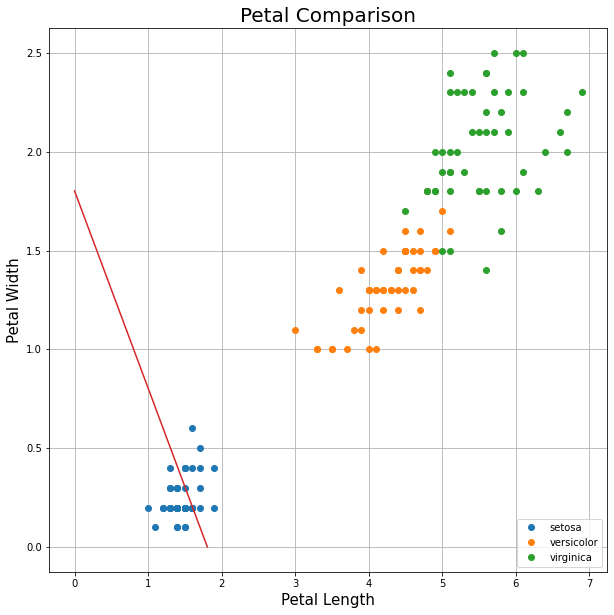

In [50]:
groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["petal_length"], group["petal_width"], marker="o", linestyle="", label=name)
plt.legend(loc = "lower right")
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Petal Comparison", fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)
plt.plot([0,p1],[p2,0],)
plt.show()

In [31]:
y = np.reshape(y, (-1,1)) #the process is the same like before but needs to re labeling
new_dataset= np.append(X, y , axis = 1)
new_dataset = new_dataset[50:,:] #but in this process exclude class 0 which the decision boundary is already created
new_dataset[:,-1] = np.where(new_dataset[:,-1]== 1, 0, 1)
np.random.shuffle(new_dataset)
second_X = new_dataset[:,:-1]
second_y = new_dataset[:,-1]


In [32]:
np.random.seed(43)
no_of_inputs = 2
weights_2 = np.random.randn(no_of_inputs +1 )
print("Initial weight %s" % weights_2)

Initial weight [ 0.25739993 -0.90848143 -0.37850311]


In [34]:
Iters = 5000 # the maximum number of training epochs
no_of_inputs = 2 # x0 is appended for bias w0.
np.random.seed(1465)
weights2 = np.random.randn(no_of_inputs + 1) # to initialize the initial weight coefficients at random
print("initial: " + str(weights2)) # to print the initial weight coefficients: [w1, w2, w0]
learning_rate = 0.1 # to specify the learning rate
correct2 = 0
for _ in range(Iters):
  for _input, label in zip(second_X, second_y):
    summation = np.dot(_input, weights2) # to compute the weighted sum
    
    if summation >= 0: # to make a decision based on the step activation function
      predicted = 1
    else:
      predicted = 0
    
    if predicted == label:
      correct2 += 1

    weights2 += learning_rate * (label - predicted) * _input # to adjust weights!?
print("trained: ", str(weights2)) # to print the trained weight coefficients
accuracy2 = (correct2/Iters)/len(second_X)
print("Accuracy ", str(accuracy2) )

#92.4% is the best acuracy that i could get

initial: [-0.10701912 -0.01650817  0.58331321]
trained:  [  4.40298088   5.94349183 -31.91668679]
Accuracy  0.924298


In [35]:
pp1 = abs((weights2[2]/weights2[1]))
pp2 = abs((weights2[2]/weights2[0]))
print("point 1 :", str(pp1))
print("point 2: ", str(pp2))

point 1 : 5.370022829784549
point 2:  7.248881531266166


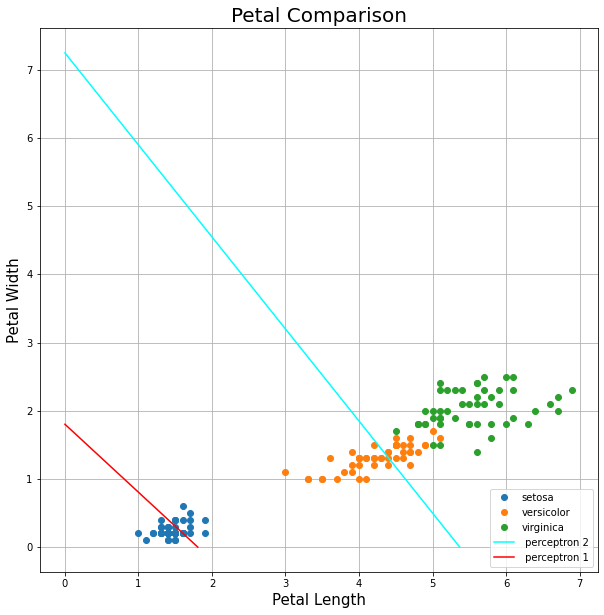

In [36]:
groups = iris.groupby("species")
for name, group in groups:
    plt.plot(group["petal_length"], group["petal_width"], marker="o", linestyle="", label=name)
plt.grid()
plt.rcParams["figure.figsize"] = (10,10)
plt.title("Petal Comparison", fontsize=20)
plt.xlabel('Petal Length', fontsize=15)
plt.ylabel('Petal Width', fontsize=15)
plt.plot([0,pp1],[pp2,0], c = "cyan", label = " perceptron 2")
plt.plot([0,p1],[p2,0], c = "red",  label = " perceptron 1")
plt.legend(loc = "lower right")
plt.show()